<a href="https://colab.research.google.com/github/asogwachiuba/DETR-Research-Project/blob/main/DETR_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A',
    'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]


In [2]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_detr(
    image_path,
    model,
    threshold=0.7,
    device=None
):
    """
    Visualize DETR predictions for a single image.
    """

    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    model.eval()
    model.to(device)

    # DETR expects this normalization
    transform = T.Compose([
        T.Resize(800),
        T.ToTensor(),
        T.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)

    # DETR outputs
    logits = outputs["pred_logits"][0]     # [num_queries, num_classes]
    boxes = outputs["pred_boxes"][0]       # [num_queries, 4]

    probs = logits.softmax(-1)
    scores, labels = probs.max(-1)

    keep = (labels != 91) & (scores > threshold)  # remove "no-object"

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    img_w, img_h = image.size

    for score, label, box in zip(scores[keep], labels[keep], boxes[keep]):
        cx, cy, w, h = box.tolist()

        x = (cx - w / 2) * img_w
        y = (cy - h / 2) * img_h
        w *= img_w
        h *= img_h

        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=2,
            edgecolor="red",
            facecolor="none"
        )
        ax.add_patch(rect)

        ax.text(
            x, y,
            f"{CLASSES[label]}: {score:.2f}",
            fontsize=10,
            color="white",
            bbox=dict(facecolor="red", alpha=0.7)
        )

    ax.axis("off")
    plt.show()


Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 82.5MB/s]


Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


100%|██████████| 159M/159M [00:01<00:00, 143MB/s]


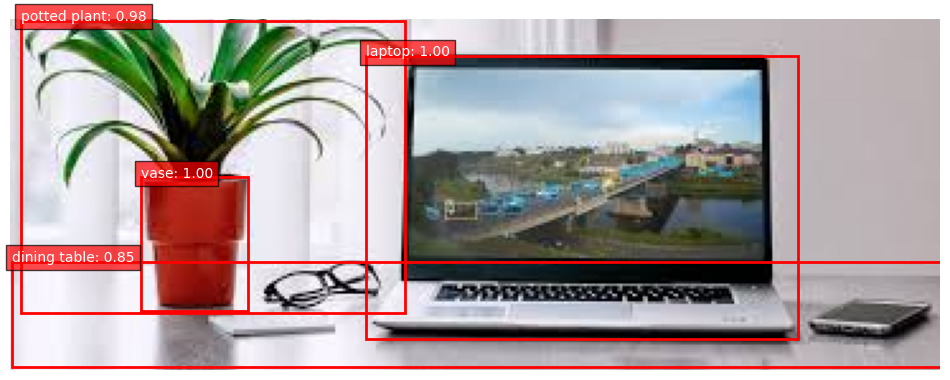

In [3]:
import torch

model = torch.hub.load(
    'facebookresearch/detr:main',
    'detr_resnet50',
    pretrained=True
)

visualize_detr(
    image_path="/content/test1.jpeg",
    model=model,
    threshold=0.8
)
